In [ ]:
import pandas as pd
import numpy as np


## Task-1
# Bike Details Dataset

**Source:**  
The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale platforms.

**Description:**  
The dataset contains 1061 records of used bike listings, offering insights into the second-hand bike market. These records include details such as the bike's brand and model, selling price, kilometers driven, ownership history, and other relevant attributes. It is a valuable resource for resale value prediction, market analysis, and understanding buyer preferences.

The dataset features 7 attributes, a mix of numeric and categorical data, providing a comprehensive overview of the factors influencing the resale of bikes.


In [ ]:
df=pd.read_csv('/content/BIKE DETAILS.csv')

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
# prompt:  What is the range of selling prices in the dataset

min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f"The range of selling prices is from {min_price} to {max_price}")

The range of selling prices is from 5000 to 760000


In [ ]:
#  What is the median selling price for bikes in the dataset
median_price = df['selling_price'].median()
print(f"The median selling price for bikes in the dataset is {median_price}")

The median selling price for bikes in the dataset is 45000.0


In [ ]:
# What is the most common seller type
most_common_seller = df['seller_type'].value_counts().idxmax()
print(f"The most common seller type is {most_common_seller}")

The most common seller type is Individual


In [ ]:
# How many bikes have driven more than 50,000 kilometers
bikes_driven_above_50k = df[df['km_driven'] > 50000]
num_bikes_above_50k = len(bikes_driven_above_50k)
print(f"{num_bikes_above_50k} bikes have driven more than 50,000 kilometers")

170 bikes have driven more than 50,000 kilometers


In [ ]:
# What is the average km_driven value for each ownership type
avg_km_driven_by_ownership = df.groupby('owner')['km_driven'].mean()
print("Average km_driven value for each ownership type:")
print(avg_km_driven_by_ownership)

Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
# What proportion of bikes are from the year 2015 or older

bikes_from_recent_years = df[df['year'] >= 2015]
proportion_recent_years = len(bikes_from_recent_years) / len(df)
print(f"The proportion of bikes from the year 2015 or older is {proportion_recent_years:.2%}")

The proportion of bikes from the year 2015 or older is 52.78%


In [ ]:
#  What is the trend of missing values across the dataset

missing_values_trend = df.isnull().sum() / len(df)
print("Trend of missing values across the dataset:")
print(missing_values_trend)

Trend of missing values across the dataset:
name                 0.000000
selling_price        0.000000
year                 0.000000
seller_type          0.000000
owner                0.000000
km_driven            0.000000
ex_showroom_price    0.409991
dtype: float64


In [ ]:
# What is the highest ex_showroom_price recorded, and for which bike
highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df[df['ex_showroom_price'] == highest_ex_showroom_price]
print(f"The highest ex_showroom_price recorded is {highest_ex_showroom_price}")
print("Bike with the highest ex_showroom_price:")
print(bike_with_highest_price)

The highest ex_showroom_price recorded is 1278000.0
Bike with the highest ex_showroom_price:
                           name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0  


In [ ]:
# D What is the total number of bikes listed by each seller type
total_bikes_by_seller = df.groupby('seller_type').size()
print("Total number of bikes listed by each seller type:")
print(total_bikes_by_seller)

Total number of bikes listed by each seller type:
seller_type
Dealer           6
Individual    1055
dtype: int64


In [ ]:
#  What is the relationship between selling_price and km_driven for first-owner bikes

first_owner_bikes = df[df['owner'] == 'First Owner']
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"The correlation between selling_price and km_driven for first-owner bikes is {correlation}")

The correlation between selling_price and km_driven for first-owner bikes is nan


In [ ]:
#  Identify and remove outliers in the km_driven column using the IQR method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]






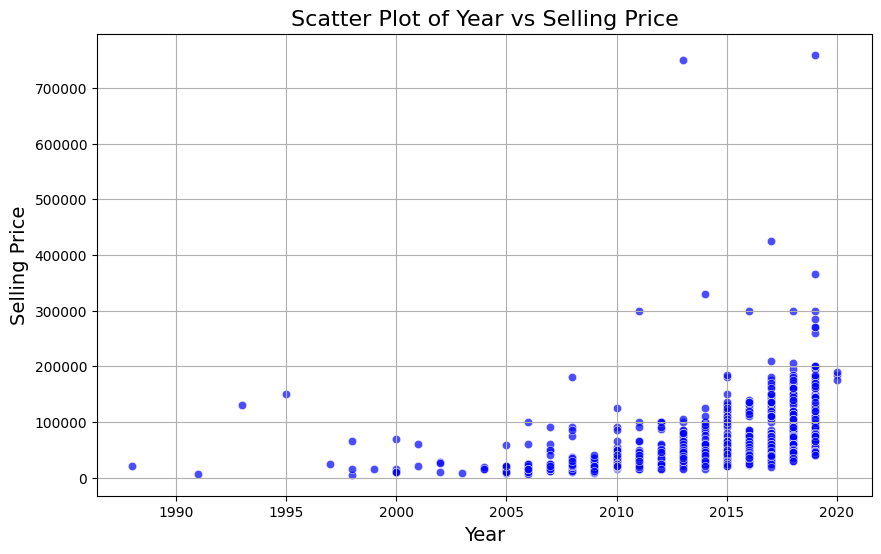

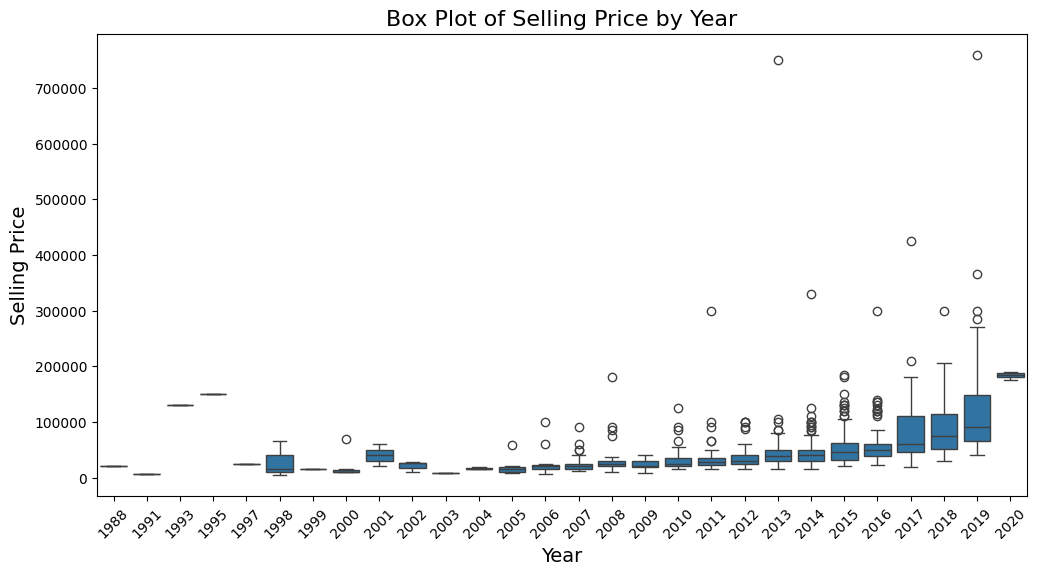

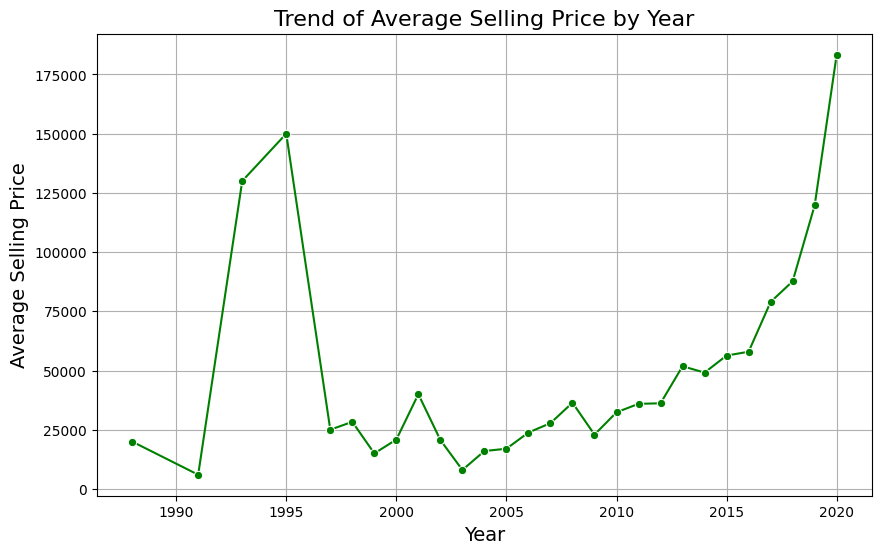

In [ ]:
# Perform a bivariate analysis to visualize the relationship between year and selling_priceD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.7, color='blue')
plt.title('Scatter Plot of Year vs Selling Price', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.grid(True)
plt.show()

# Box Plot: Selling Price Distribution per Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Box Plot of Selling Price by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Selling Price', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels if there are many years
plt.show()

# Line Plot: Average Selling Price per Year
average_price = df.groupby('year')['selling_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='selling_price', data=average_price, marker='o', color='green')
plt.title('Trend of Average Selling Price by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Selling Price', fontsize=14)
plt.grid(True)
plt.show()



In [ ]:
# What is the average depreciation in selling price based on the bike's age (current year - manufacturing
# year
current_year = 2023
df['age'] = current_year - df['year']
average_depreciation = df.groupby('age')['selling_price'].mean().reset_index()
print("Average Depreciation in Selling Price by Bike Age:")
print(average_depreciation)

Average Depreciation in Selling Price by Bike Age:
    age  selling_price
0     3  183333.333333
1     4  119689.511628
2     5   87660.374046
3     6   78962.121212
4     7   57924.126214
5     8   56313.131313
6     9   49121.348315
7    10   51802.816901
8    11   36157.560606
9    12   35931.017241
10   13   32350.877193
11   14   22934.782609
12   15   36404.000000
13   16   27768.181818
14   17   23821.052632
15   18   16978.571429
16   19   16000.000000
17   20    8000.000000
18   21   20666.666667
19   22   40000.000000
20   23   20833.333333
21   24   15000.000000
22   25   28333.333333
23   26   25000.000000
24   28  150000.000000
25   30  130000.000000
26   32    6000.000000
27   35   20000.000000


In [ ]:
#  Which bike names are priced significantly above the average price for their manufacturing year
average_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
df = pd.merge(df, average_price_by_year, on='year', suffixes=('', '_avg'))
df['price_deviation'] = df['selling_price'] - df['selling_price_avg']
significant_price_deviation = df[df['price_deviation'] > 2 * df['selling_price_avg']]
print("Bike Names Priced Above 2x Average Price by Manufacturing Year:")
print(significant_price_deviation['name'])


Bike Names Priced Above 2x Average Price by Manufacturing Year:
7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
131              Harley-Davidson Street Bob
218    Royal Enfield Bullet 350 [2007-2011]
283          Kawasaki Ninja 650 [2018-2019]
285                     Kawasaki Ninja 250R
289                         Suzuki GSX S750
300                               Yamaha Rx
305              Harley-Davidson Street 750
338                              BMW G310GS
404            KTM 390 Duke ABS [2013-2016]
749               Royal Enfield Electra 5 S
830          Kawasaki Ninja 650 [2018-2019]
857           Royal Enfield Thunderbird 350
858            Royal Enfield Classic Chrome
865                      Kawasaki Ninja 300
Name: name, dtype: object


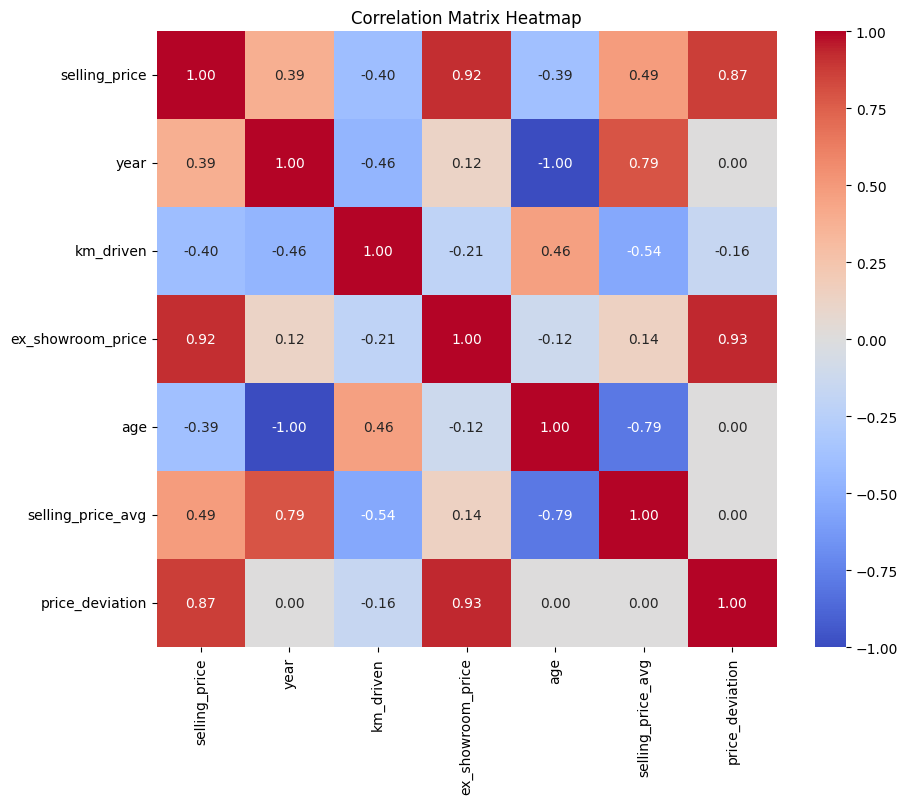

In [ ]:
# D Develop a correlation matrix for numeric columns and visualize it using a heatmap.
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

## EDA - 2
#Title: Car Sale Dataset

In [ ]:
df1=pd.read_csv('/content/Car Sale.csv')

df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
# What is the average selling price of cars for each dealer, and how does it compare across different dealers
average_price_by_dealer = df1.groupby('Dealer_Name')['Price ($)'].mean().reset_index()
print("Average Selling Price by Dealer:")
print(average_price_by_dealer)

Average Selling Price by Dealer:
                                        Dealer_Name     Price ($)
0               Buddy Storbeck's Diesel Service Inc  27217.261563
1                                  C & M Motors Inc  28111.755200
2                                       Capitol KIA  28189.703822
3                                 Chrysler Plymouth  27555.526400
4                            Chrysler of Tri-Cities  28123.091054
5                                     Classic Chevy  28602.014446
6                           Clay Johnson Auto Sales  27816.027113
7                                Diehl Motor CO Inc  27993.929487
8                             Enterprise Rent A Car  28312.580800
9                        Gartner Buick Hyundai Saab  28247.621019
10                              Hatfield Volkswagen  27853.712242
11                                  Iceberg Rentals  28522.958533
12                     McKinney Dodge Chrysler Jeep  27684.096979
13                      Motor Vehicle Branc

In [ ]:
# Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
# trends
price_variation_by_brand = df1.groupby('Company')['Price ($)'].std().reset_index()
price_variation_by_brand.columns = ['Company', 'Price Variation']
price_variation_by_brand = price_variation_by_brand.sort_values(by='Price Variation', ascending=False)
print("Car Brand with Highest Price Variation:")
print(price_variation_by_brand.iloc[0])

Car Brand with Highest Price Variation:
Company                 Lincoln
Price Variation    19658.050211
Name: 15, dtype: object


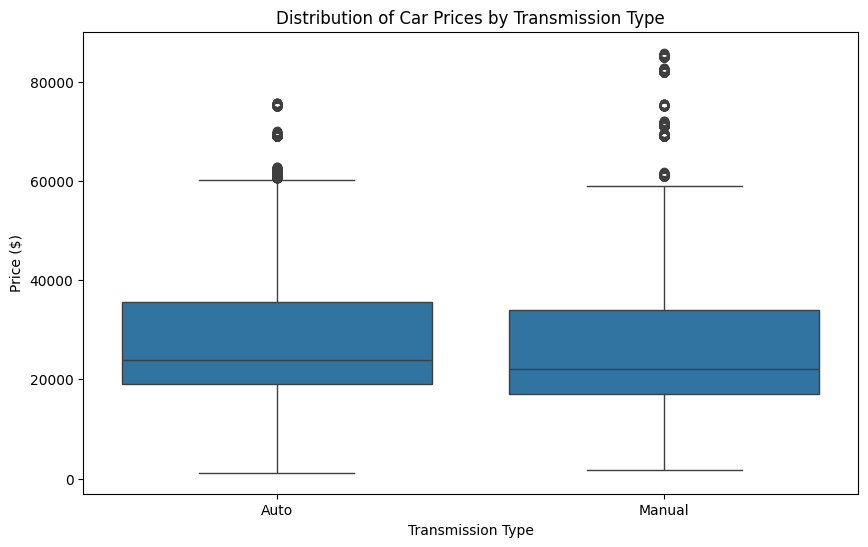

In [ ]:
# What is the distribution of car prices for each transmission type, and how do the interquartile ranges
# compare
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()


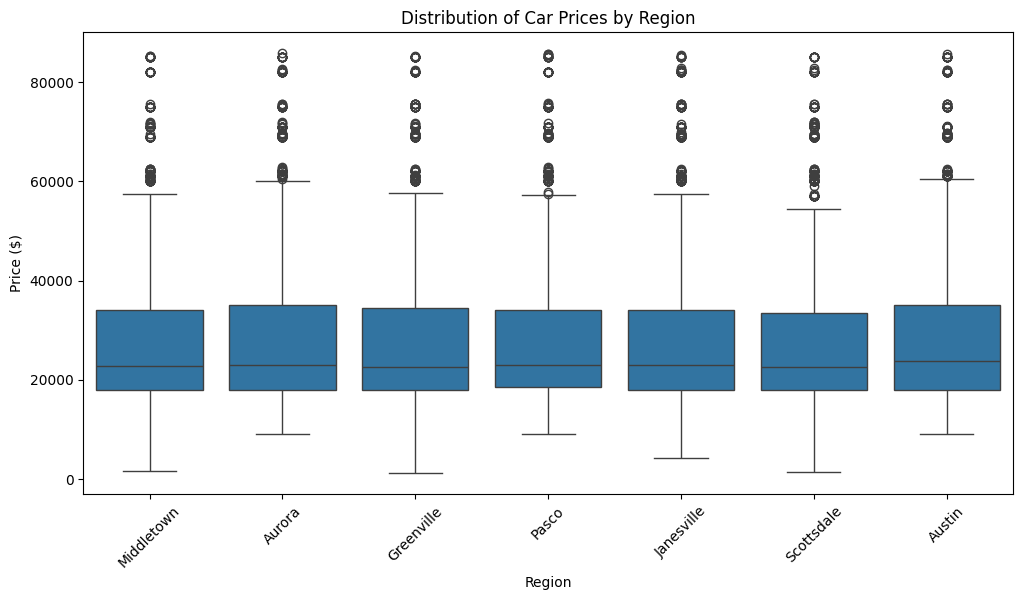

In [ ]:
# What is the distribution of car prices across different regionsO
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


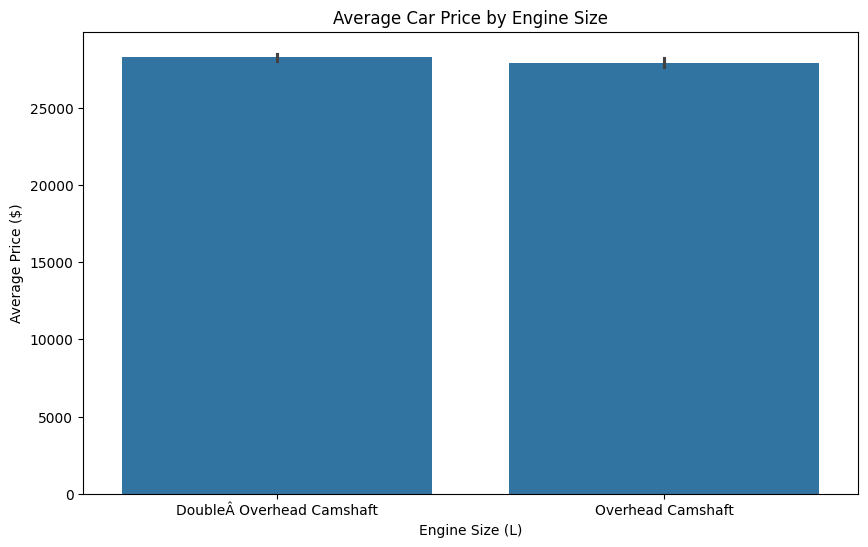

In [ ]:
#  How does the average car price differ between cars with different engine sizes
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Engine', y='Price ($)', data=df1)
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Average Price ($)')
plt.show()

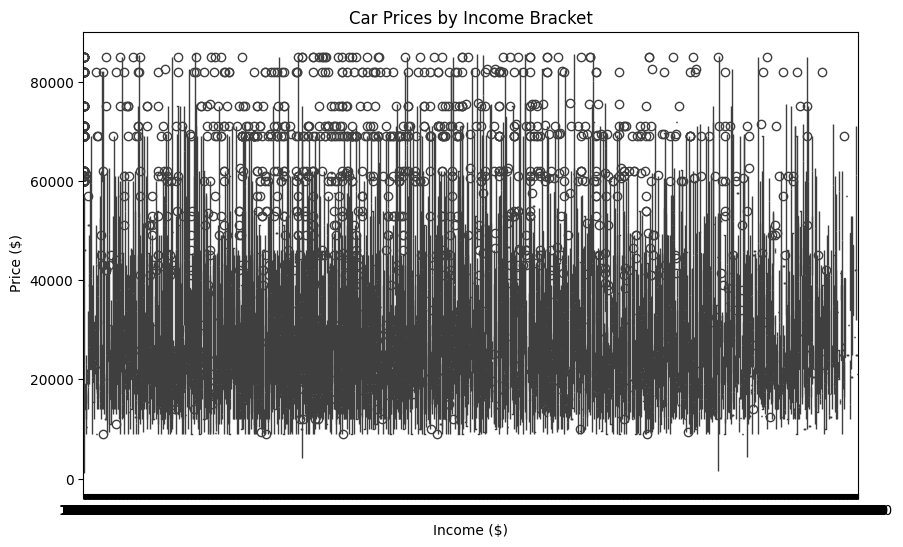

In [ ]:
#  How do car prices vary based on the customer’s annual income bracket
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Annual Income', y='Price ($)', data=df1)
plt.title('Car Prices by Income Bracket')
plt.xlabel('Income ($)')
plt.ylabel('Price ($)')
plt.show()



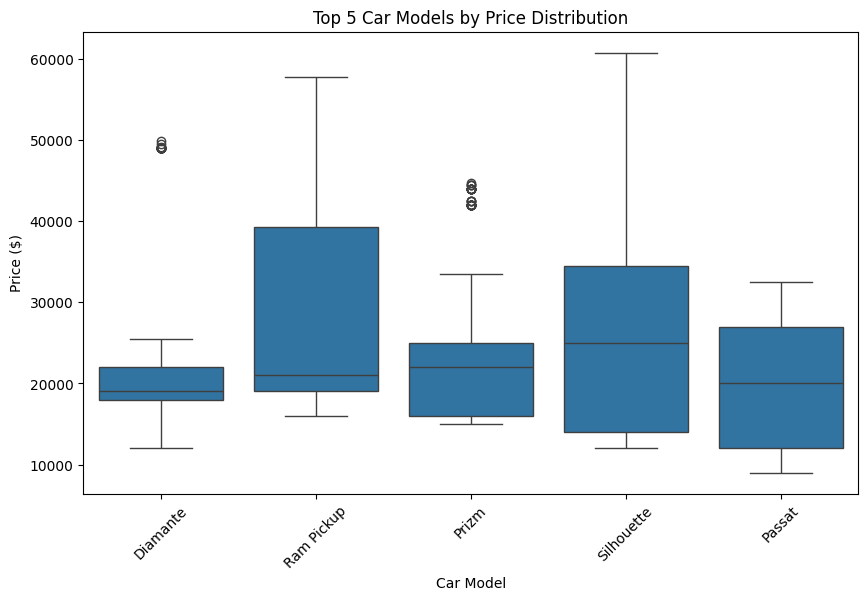

In [ ]:
#  What are the top 5 car models with the highest number of sales, and how does their price distribution look
top_models = df1['Model'].value_counts().head(5)
top_model_data = df1[df1['Model'].isin(top_models.index)]
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_model_data)
plt.title('Top 5 Car Models by Price Distribution')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#  How does car price vary with engine size across different car colors, and which colors have the highest price
# variation
price_variation_by_color = df1.groupby('Color')['Price ($)'].std().reset_index()
price_variation_by_color.columns = ['Color', 'Price Variation']
price_variation_by_color = price_variation_by_color.sort_values(by='Price Variation', ascending=False)
print("Car Colors with Highest Price Variation:")
print(price_variation_by_color.head())


Car Colors with Highest Price Variation:
        Color  Price Variation
2         Red     15519.360962
0       Black     15286.065976
1  Pale White     14077.346859


Text(0, 0.5, 'Number of Sales')

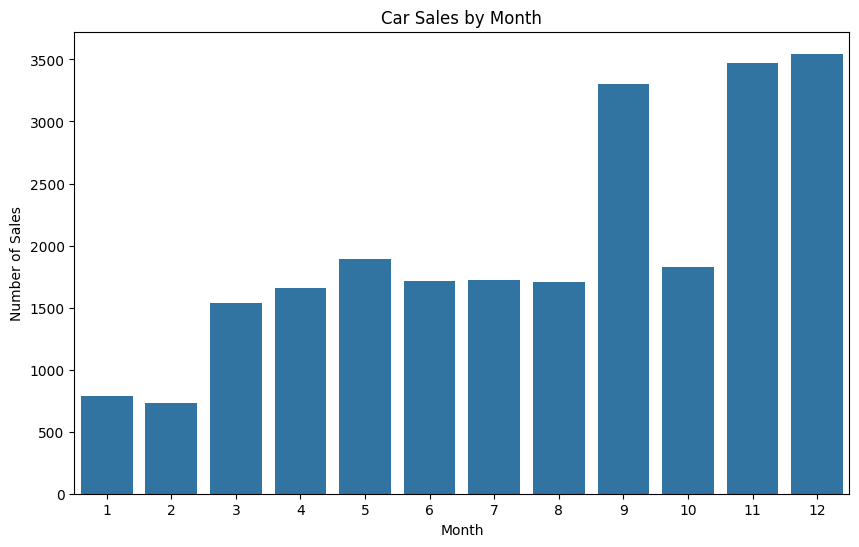

In [ ]:
# Is there any seasonal trend in car sales based on the date of sale
import matplotlib.pyplot as plt
import seaborn as sns

df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].dt.month
monthly_sales = df1.groupby('Month').size().reset_index(name='Sales Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales Count', data=monthly_sales)
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


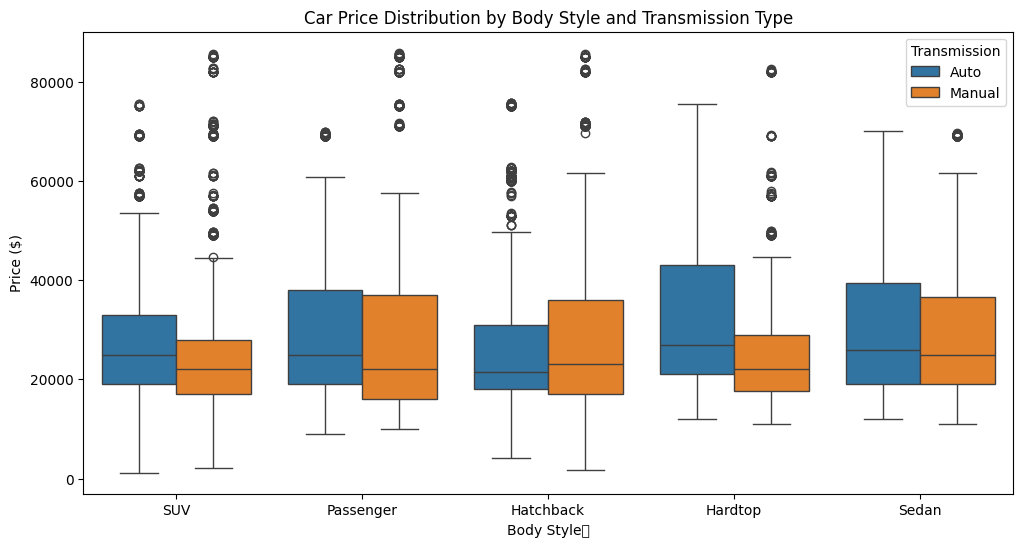

In [ ]:
# How does the car price distribution change when considering different combinations of body style and
# transmission type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df1)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style	')
plt.ylabel('Price ($)')
plt.show()

Correlation Matrix:
               Price ($)  Engine Size  Annual Income
Price ($)       1.000000     0.011271       0.012065
Engine Size     0.011271     1.000000       0.006598
Annual Income   0.012065     0.006598       1.000000


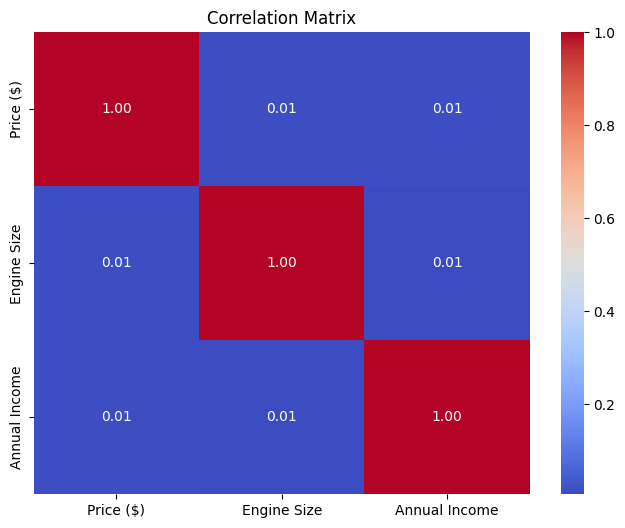

In [ ]:
# What is the correlation between car price, engine size, and annual income of customers, and how do these
# features interact

df1['Annual Income'] = pd.to_numeric(df1['Annual Income'], errors='coerce')
df1['Engine Size'] = df1['Engine'].apply(lambda x: 2 if 'Double' in x else 1)

# Drop missing values for relevant columns
df1 = df1.dropna(subset=['Price ($)', 'Annual Income', 'Engine Size'])

# Calculate the correlation matrix
correlation_matrix = df1[['Price ($)', 'Engine Size', 'Annual Income']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# How does the average car price vary across different car models and engine types?

average_price_by_model = df1.groupby('Model')['Price ($)'].mean().reset_index()
print("Average Car Price by Model:")
print(average_price_by_model)


Average Car Price by Model:
        Model     Price ($)
0       3-Sep  37986.380117
1      3000GT  22282.250825
2        300M  21394.888889
3        323i  17355.634615
4        328i  27821.359223
..        ...           ...
149     Viper  30905.258333
150   Voyager  31491.110497
151  Windstar  23682.842975
152  Wrangler  20134.548780
153    Xterra  18901.076087

[154 rows x 2 columns]


# EDA -3

In [ ]:
 ddf=pd.read_csv('/content/amazon.csv')

In [ ]:
ddf.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:

ddf.shape

(1465, 16)

Category Distribution:
 category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|Dr

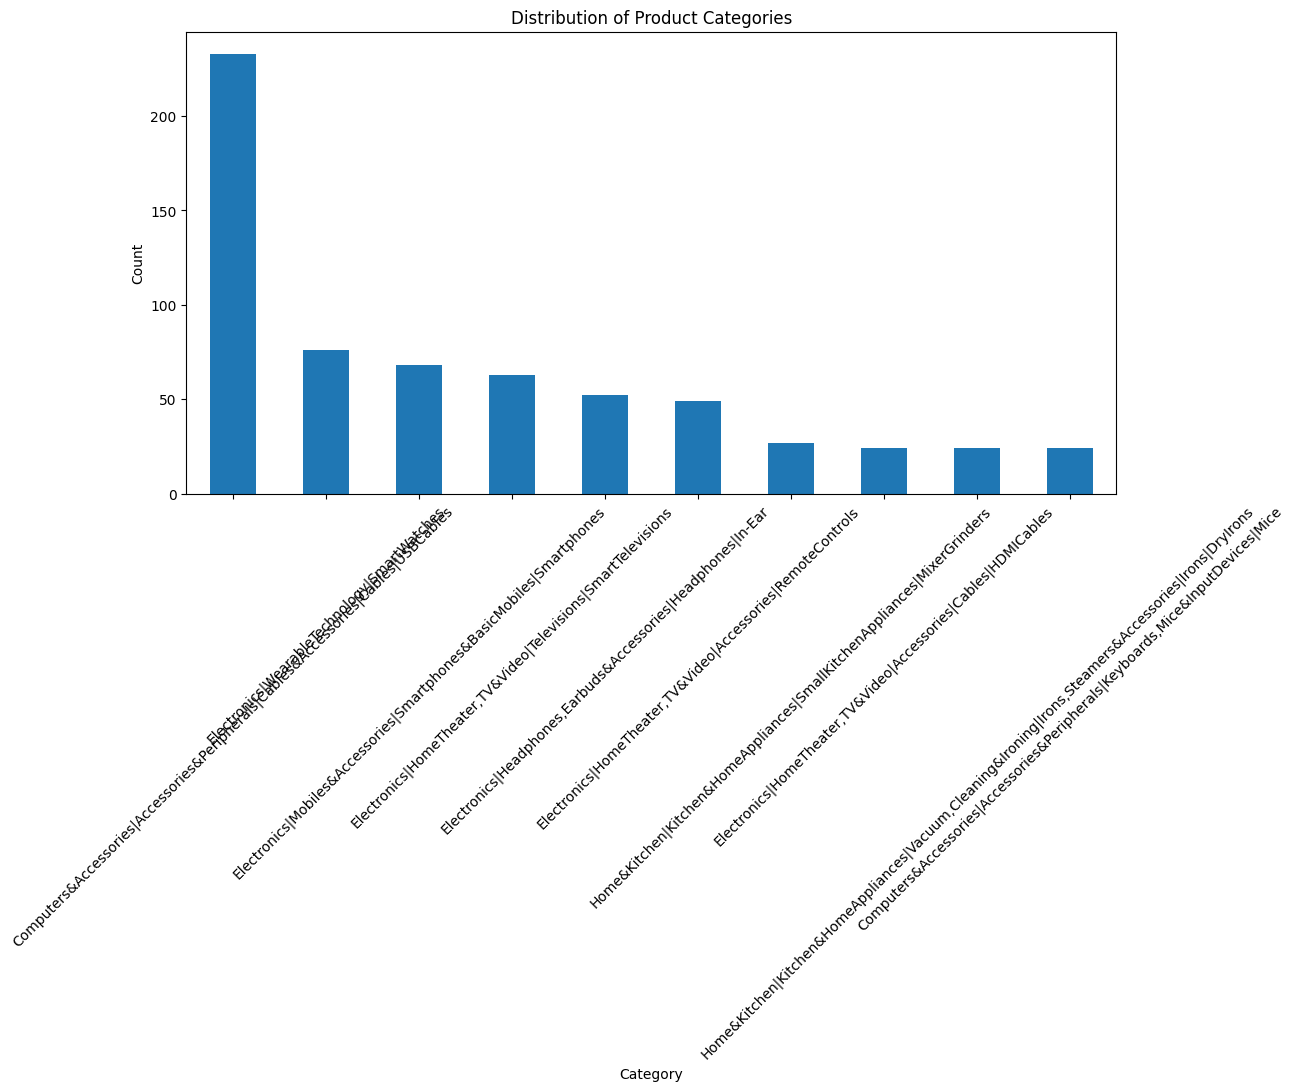

In [ ]:
# 1. Distribution of product categories
category_counts = ddf['category'].value_counts().head(10)
print("Category Distribution:\n", category_counts)

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 2. Most and least expensive products
most_expensive = ddf.loc[ddf['actual_price'].idxmax()]
least_expensive = ddf.loc[ddf['actual_price'].idxmin()]
print("Most Expensive Product:\n", most_expensive[['product_name', 'actual_price']])
print("Least Expensive Product:\n", least_expensive[['product_name', 'actual_price']])

Most Expensive Product:
 product_name    TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...
actual_price                                                 ₹999
Name: 8, dtype: object
Least Expensive Product:
 product_name    pTron Solero TB301 3A Type-C Data and Fast Cha...
actual_price                                               ₹1,000
Name: 5, dtype: object


In [ ]:

# 3. Average discount percentage
average_discount = ddf['discounted_price'].mean()
print("Average Discount Percentage:", average_discount)

Average Discount Percentage: 3125.305119453925


In [ ]:
# Remove currency symbols and commas, then convert to integer
# ddf['actual_price'] = ddf['actual_price'].str.replace('[₹,]', '', regex=True).astype(float).astype(int)
ddf['discounted_price'] = ddf['discounted_price'].str.replace('[₹,]', '', regex=True).astype(float).astype(int)

# Check the updated data types and preview the columns
print(ddf[['actual_price', 'discounted_price']].head())


   actual_price  discounted_price
0          1099               399
1           349               199
2          1899               199
3           699               329
4           399               154


Correlation Matrix:
                      discounted_price  actual_price  discount_percentage
discounted_price             1.000000      0.961915            -0.242412
actual_price                 0.961915      1.000000            -0.118098
discount_percentage         -0.242412     -0.118098             1.000000


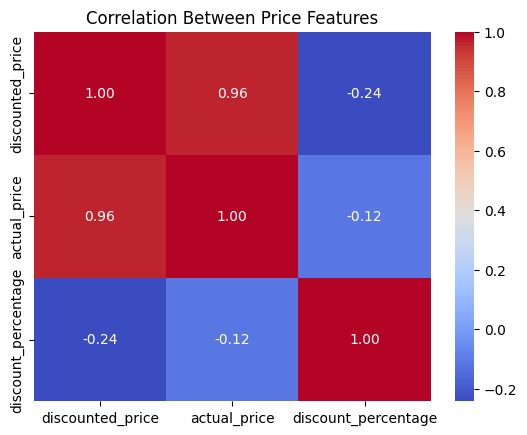

In [ ]:
# 5. Correlation between price-related columns
# Convert 'discount_percentage' to numeric by removing '%' and converting to float
ddf['discount_percentage'] = ddf['discount_percentage'].str.rstrip('%').astype(float)

correlation_matrix = ddf[['discounted_price', 'actual_price', 'discount_percentage']].corr()
print("Correlation Matrix:\n", correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Price Features')
plt.show()

In [ ]:
# 6. Top-rated products
top_rated_products = ddf.sort_values('rating', ascending=False).head(10)
print("Top Rated Products:\n", top_rated_products[['product_name', 'rating']])

Top Rated Products:
                                            product_name rating
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...      |
324   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...    5.0
174   Syncwire LTG to USB Cable for Fast Charging Co...    5.0
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...    5.0
1201  Oratech Coffee Frother electric, milk frother ...    4.8
1145  Swiffer Instant Electric Water Heater Faucet T...    4.8
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...    4.8
1223  FIGMENT Handheld Milk Frother Rechargeable, 3-...    4.7
1388  Campfire Spring Chef Prolix Instant Portable W...    4.7
1275  Multifunctional 2 in 1 Electric Egg Boiling St...    4.7


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

d=pd.read_csv('/content/spotify.csv')






In [4]:
d.shape

(440, 5)

In [9]:
# Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
# the needful
d.isna().sum()




,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


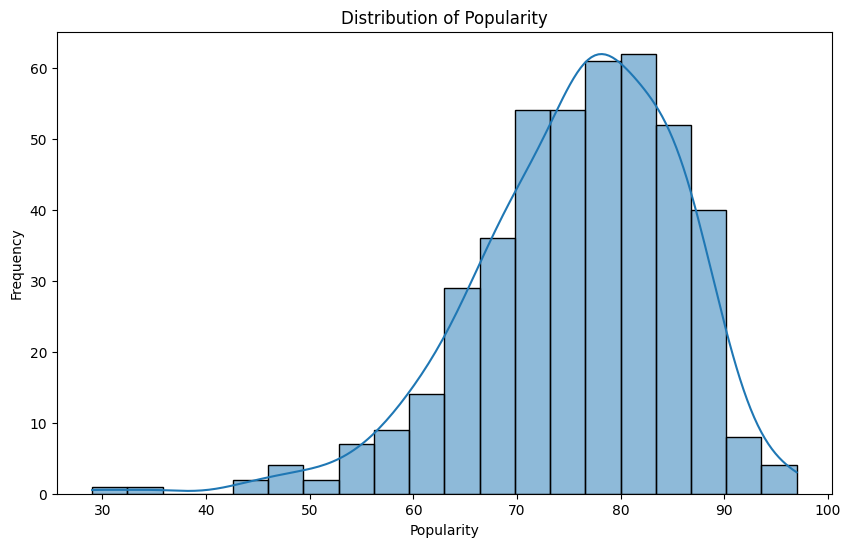

In [12]:
# What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

plt.figure(figsize=(10, 6))
sns.histplot(d['Popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


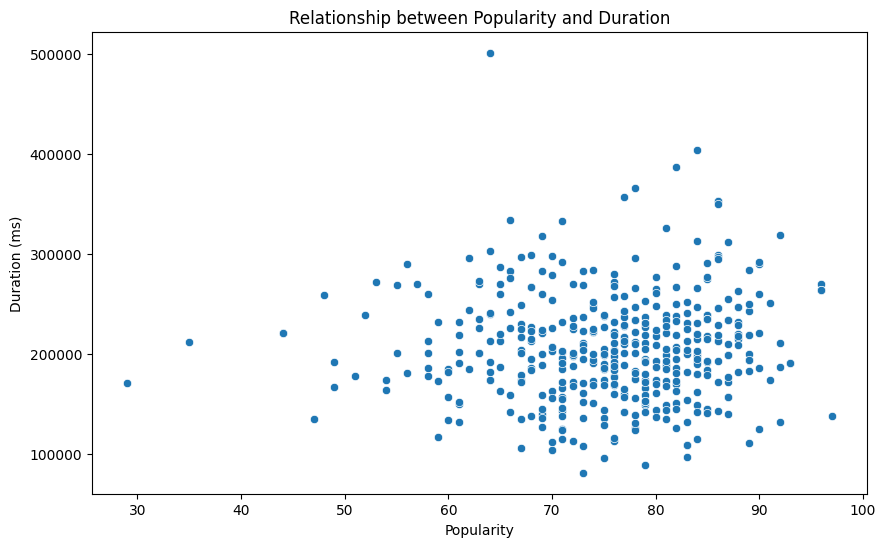

In [17]:
#  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Popularity', y='Duration (ms)', data=d)
plt.title('Relationship between Popularity and Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

Artist with the Highest Number of Tracks: Drake


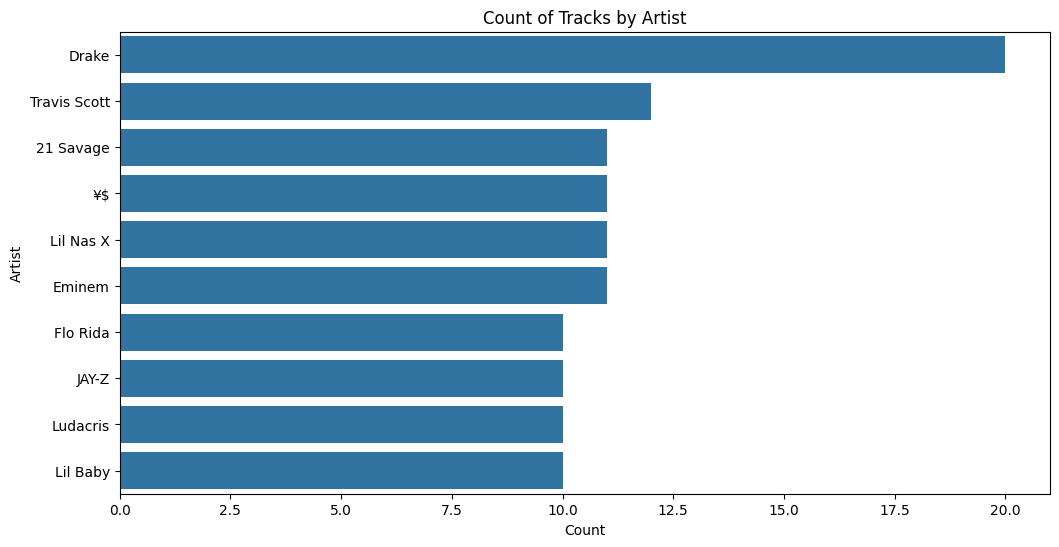

In [19]:
# Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
# a countplot
artist_track_counts = d['Artist'].value_counts().head(10)
most_popular_artist = artist_track_counts.idxmax()
print("Artist with the Highest Number of Tracks:", most_popular_artist)
plt.figure(figsize=(12, 6))
sns.countplot(y='Artist', data=d, order=artist_track_counts.index)
plt.title('Count of Tracks by Artist')
plt.xlabel('Count')
plt.ylabel('Artist')
plt.show()


In [23]:
# What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each
least_popular_tracks = d.sort_values('Popularity', ascending=True).head(5)
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])






Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
435  French Montana                Splash Brothers          44
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [24]:
#  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
# display the average popularity for each artist.
top_artists = d['Artist'].value_counts().head(5)
average_popularity_by_artist = d.groupby('Artist')['Popularity'].mean()
highest_avg_popularity_artist = average_popularity_by_artist.idxmax()
print("Top 5 Most Popular Artists:")
print(top_artists)
print("Average Popularity by Artist:")
print(average_popularity_by_artist)
print("Artist with Highest Average Popularity:", highest_avg_popularity_artist)



Top 5 Most Popular Artists:
Artist
Drake           20
Travis Scott    12
21 Savage       11
¥$              11
Lil Nas X       11
Name: count, dtype: int64
Average Popularity by Artist:
Artist
*NSYNC                    67.000000
2 Chainz                  72.000000
21 Savage                 84.181818
A Boogie Wit da Hoodie    80.000000
A$AP Ferg                 69.000000
                            ...    
Young Nudy                67.000000
Young Thug                73.750000
benny blanco              72.000000
cassö                     92.000000
¥$                        86.090909
Name: Popularity, Length: 115, dtype: float64
Artist with Highest Average Popularity: cassö


In [25]:
#  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
top_artists = d['Artist'].value_counts().head(5)
most_popular_tracks_by_artist = d[d['Artist'].isin(top_artists.index)].groupby('Artist')['Track Name'].apply(list)
print("Most Popular Tracks by Top 5 Artists:")
print(most_popular_tracks_by_artist)



Most Popular Tracks by Top 5 Artists:
Artist
21 Savage       [née-nah, redrum, née-nah, n.h.i.e., Glock In ...
Drake           [Rich Baby Daddy (feat. Sexyy Red & SZA), One ...
Lil Nas X       [INDUSTRY BABY (feat. Jack Harlow), INDUSTRY B...
Travis Scott    [MELTDOWN (feat. Drake), FE!N (feat. Playboi C...
¥$              [CARNIVAL, BURN, FUK SUMN, BACK TO ME, STARS, ...
Name: Track Name, dtype: object


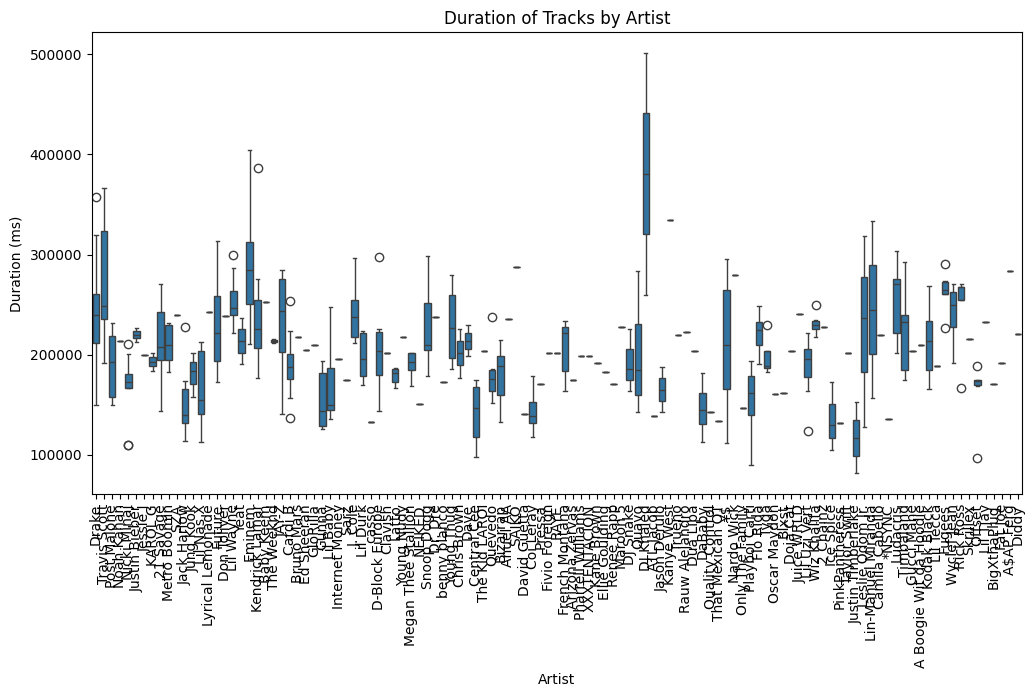

In [30]:
# Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
# violin plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Duration (ms)', data=d)
plt.title('Duration of Tracks by Artist')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=90)
plt.show()

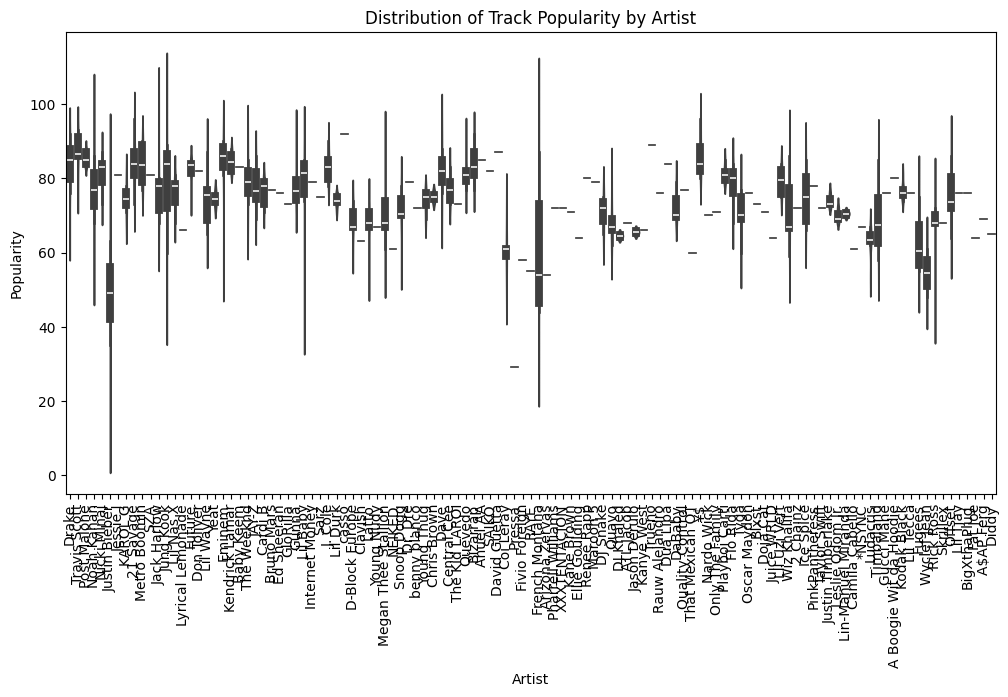

In [32]:
# How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
# violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Artist', y='Popularity', data=d)
plt.title('Distribution of Track Popularity by Artist')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()
